### Import libraries

In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Make reproducible results

In [2]:
# from numpy.random import seed
# seed(1)
# # from tensorflow import set_random_seed
# from tensorflow.random import set_seed 
# # set_random_seed(2)
# set_seed(2)

### Check out the directories

In [3]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/')

In [4]:
os.listdir('../Dataset_4_classe/')

['Train', 'Val']

In [5]:
os.listdir('../Dataset_4_classe/Train/')

['Covid', 'NORMAL', 'Pneumocystis', 'Streptococcus']

In [6]:
Train_NORMAL = os.listdir('../Dataset_4_classe/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_Pneumocystis = os.listdir('../Dataset_4_classe/Train/Pneumocystis/')
print('Train_Pneumocystis = ', len(Train_Pneumocystis))

Train_Streptococcus = os.listdir('../Dataset_4_classe/Train/Streptococcus/')
print('Train_Streptococcus = ', len(Train_Streptococcus))

Train_Covid = os.listdir('../Dataset_4_classe/Train/Covid/')
print('Train_Covid = ', len(Train_Covid))

Train_NORMAL =  159
Train_Pneumocystis =  16
Train_Streptococcus =  8
Train_Covid =  159


In [7]:
Val_NORMAL = os.listdir('../Dataset_4_classe/Val/NORMAL/')
print('Val_NORMAL = ', len(Val_NORMAL))

Val_Pneumocystis = os.listdir('../Dataset_4_classe/Val/Pneumocystis/')
print('Val_Pneumocystis = ', len(Val_Pneumocystis))

Val_Streptococcus = os.listdir('../Dataset_4_classe/Val/Streptococcus/')
print('Val_Streptococcus = ', len(Val_Streptococcus))

Val_Covid = os.listdir('../Dataset_4_classe/Val/Covid/')
print('Val_Covid = ', len(Val_Covid))

Val_NORMAL =  30
Val_Pneumocystis =  3
Val_Streptococcus =  2
Val_Covid =  30


## Quick look to the images 

In [8]:
print('Images_names \n ', 
      Train_NORMAL[0], '\n' ,
      Train_Covid[0], '\n' ,
      Train_Pneumocystis[0], '\n' , 
      Train_Streptococcus[1])

Images_names 
  IM-0383-0001.jpeg 
 10.1016-slash-j.anl.2020.04.002-a.png 
 000001-1.png 
 2fc8a7c61c76f13ee7f9306b44e792_jumbo.jpg


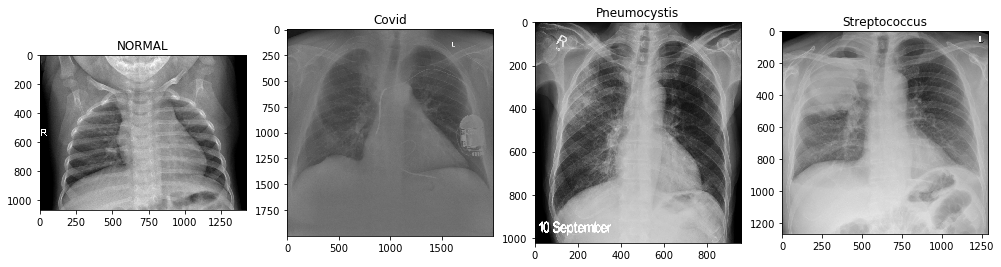

In [9]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'NORMAL2-IM-1056-0001.jpeg'
img_normal = load_img('../Dataset_4_classe/Train/NORMAL/' + img_name)

img_name_1 = 'f6d980a0.jpg'
img_Covid = load_img('../Dataset_4_classe/Train/Covid/' + img_name_1)

img_name_2 = '26eecee1e498237cc3ea3274b79ff0_jumbo.jpg'
img_Pneumocystis = load_img('../Dataset_4_classe/Train/Pneumocystis/' + img_name_2)

img_name_3 = 'cavitating-pneumonia-4-day0-PA.jpg'
img_Streptococcus = load_img('../Dataset_4_classe/Train/Streptococcus/' + img_name_3)



fig, axs = plt.subplots(1,4,figsize=(17,10))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")

axs[1].imshow(img_Covid)
axs[1].set_title("Covid");


axs[2].imshow(img_Pneumocystis)
axs[2].set_title("Pneumocystis")

axs[3].imshow(img_Streptococcus)
axs[3].set_title("Streptococcus");


plt.savefig("../Assets/plot_01_assets_1_4classes.png")

### Assemble CNN model

In [10]:
model = Sequential()
activ = 'sigmoid'

model.add(Conv2D(32, kernel_size=(3,3),
                 activation=activ,
                 input_shape=(224,224,3)))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(64, activation=activ))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

### Metrics

In [11]:
# metr_auc = tensorflow.keras.metrics.AUC(num_thresholds=200, curve='ROC')
# TP = tensorflow.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)
# TN = tensorflow.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None)
# FP = tensorflow.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None)
# FN = tensorflow.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)

# Recall_metr = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, 
#                 class_id=None, name=None, dtype=None)
# mtr_list = ['accuracy','mse', metr_auc,TP,TN,FP,FN]
mtr_list = ['accuracy']

any time that you have several images (multiclass classification), use two to three convolution layers.
Also,a use softmax as activation for the last layer as I did above (my recommendation but you may test other types either).
Note that the categorical_crossentropy isalmost default for multiclass classifiers.

remember that we always use convolution layers for images. the reason is if we use dense layers we will lose positional information in images.

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop', 
              metrics=mtr_list)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      3

### Prepare the data

* Resacle function does normalization.
* Augment the data set for both train and val.
* Then use flow to apply the data augmention.

In [13]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

for val data set just apply rescale function.

In [14]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

### Flow the data to generator

In [53]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset_4_classe/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 342 images belonging to 4 classes.


In [54]:
validation_generator = val_dataset.flow_from_directory(
                    directory='../Dataset_4_classe/val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 65 images belonging to 4 classes.


### Show some images after data augmentation

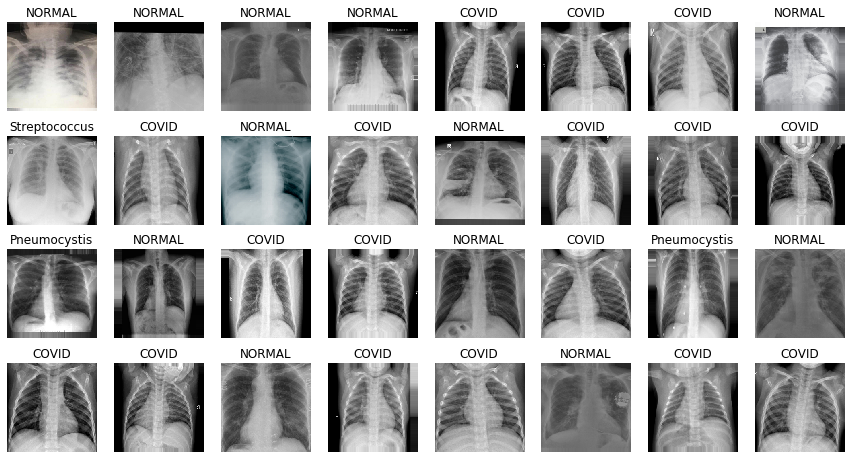

In [82]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 8))
    for n in range(32):
        ax = plt.subplot(4, 8, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n][0]==1:
            plt.title("NORMAL")
        elif label_batch[n][1]==1:
            plt.title("COVID")
        elif label_batch[n][2]==1:
            plt.title("Pneumocystis")
        else:
            plt.title("Streptococcus")
        plt.axis("off")

show_batch(image_batch, label_batch)
plt.savefig("../Assets/plot_01_assets_2_4classes.png")

In [78]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=False)

1    159
0    159
2     16
3      8
Name: 0, dtype: int64

### Train the CNN model

#### Note that we have imbalance data. one way to figure it out is to use weighted classes loss as it is seen below.

In [83]:
# ref: https://stackoverflow.com/questions/42586475/is-it-possible-to-automatically-
#infer-the-class-weight-from-flow-from-directory/42587192#42587192
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()} 
class_weights

{0: 1.0, 1: 1.0, 2: 9.9375, 3: 19.875}

#### Now fit the model. But lets add check point so we don't lose the best model. 

I used val_accuarcy as important parameters.

In [103]:
# inserting the parent directory into current path
# sys.path.insert(1, '../COVID_19/')
sys.path.insert(1, '../DeepNet_4_class_classification_Project/')
# filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

save_filepath = "../Codes/Models/model_4_class_epoch_{epoch:02d}_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}_.h5"
checkpoint = ModelCheckpoint(save_filepath, 
                             monitor='val_accuracy', 
                             verbose=1,
                             save_best_only=False, 
                             mode='max', 
                             period=1)

In [104]:
%%time
model_history = model.fit_generator(
                generator=train_generator, 
                #steps_per_epoch=300, 
                epochs=30, 
                verbose=1, 
                validation_data= validation_generator, 
                validation_steps=2, 
                class_weight=class_weights, 
                max_queue_size=10, 
                workers=1, 
                use_multiprocessing=False,
                shuffle=True, 
                initial_epoch=0,
                callbacks=[checkpoint])

Epoch 1/30
 9/11 [=======================>......] - ETA: 6s - loss: 2.2170 - accuracy: 0.7446

KeyboardInterrupt: 

### Plot the History

In [98]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())

len(model_history.history.keys()) 
 4 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [99]:
model_history_df = pd.DataFrame(model_history.history)
model_history_df

loss  accuracy  val_loss  val_accuracy
0  1.873070  0.739766  1.487593      0.453125
1  2.444321  0.681287  1.326565      0.468750
2  1.870245  0.760234  1.110846      0.484375
3  1.695291  0.754386  1.464491      0.078125
4  1.736083  0.719298  1.325689      0.171875
5  1.759274  0.733918  1.287513      0.468750
6  2.394688  0.771930  1.015735      0.578125
7  1.614706  0.766082  0.682469      0.734375
8  1.547782  0.792398  0.624889      0.781250
9  1.932426  0.751462  2.665745      0.031250

In [100]:
model_history_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

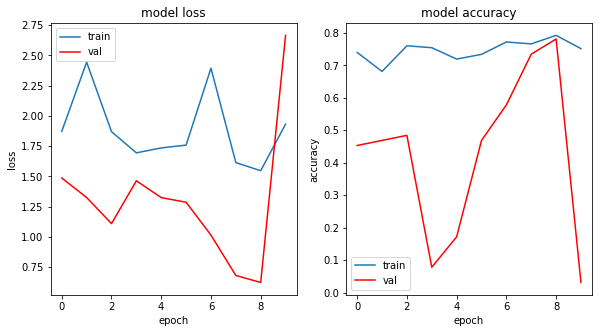

In [102]:
plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
columns = ['loss', 'accuracy']
# columns = ['loss', 'acc']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    
plt.savefig("../Figures/plot_01_1_4classes.png")

In [ ]:
# model.save("../Codes/Models/model_covid_test_4classes_82percent.h5")